## New Beach Presence Notebook

Third figure request for Stephanie

Need to:

update the field

go to scatter

In [46]:
from cartopy import crs, feature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.colorbar as colorbar
import matplotlib.cm as mcm
import numpy as np
import pandas as pd
import xarray as xr

%matplotlib inline

In [47]:
landcolour = 'papayawhip'
plt.rcParams['font.size'] = 15

In [3]:
data3d = xr.open_dataset('~/Documents/MIDOSS/MIDOSS_aggregated_merged.nc')

In [61]:
random_spills = pd.read_csv('/home/sallen/Documents/MIDOSS/northern_strait.csv', infer_datetime_format=True, parse_dates=[0])
JFM = random_spills[random_spills.spill_date_hour < dt.datetime(2018, 3, 31)].index
AMJ = random_spills[(random_spills.spill_date_hour > dt.datetime(2018, 3, 31)) &
                   (random_spills.spill_date_hour < dt.datetime(2018, 6, 30))].index
JAS = random_spills[(random_spills.spill_date_hour > dt.datetime(2018, 6, 30)) &
                   (random_spills.spill_date_hour < dt.datetime(2018, 9, 30))].index
OND = random_spills[random_spills.spill_date_hour > dt.datetime(2018, 9, 30)].index

In [19]:
jmin, jmax = data3d.x.values[0], data3d.x.values[-1]
imin, imax = data3d.y.values[0], data3d.y.values[-1]
print (jmin, jmax, imin, imax)

100 339 500 769


In [20]:
mesh = xr.open_dataset('~/Documents/MEOPAR/grid/mesh_mask201702.nc')
tmask = 1- mesh.tmask[0, 0]
dlat = mesh.nav_lat[imax, jmax] - mesh.nav_lat[imax-1, jmax-1]
dlon = mesh.nav_lon[imax, jmax] - mesh.nav_lon[imax-1, jmax-1]

In [22]:
raw = data3d.Beaching_Volume
raw

<xarray.DataArray 'Beaching_Volume' (RunId: 723, y: 270, x: 240)>
[46850400 values with dtype=float64]
Coordinates:
  * RunId    (RunId) object 'A-0' 'A-1' 'A-10' 'A-11' ... 'E-97' 'E-98' 'E-99'
  * y        (y) int64 500 501 502 503 504 505 506 ... 764 765 766 767 768 769
  * x        (x) int64 100 101 102 103 104 105 106 ... 334 335 336 337 338 339

In [30]:
oil_array = (raw > 0.001).astype(int)

In [49]:
oil_JFM = np.array([oil_array[i] for i in JFM]).mean(axis=0)
oil_JFM.shape

(270, 240)

In [50]:
oil_ma_JFM = np.ma.masked_array(oil_JFM, oil_JFM < 0.01)  #mask anything less than 1%
oil = oil_ma_JFM
print (oil.max())

0.18125


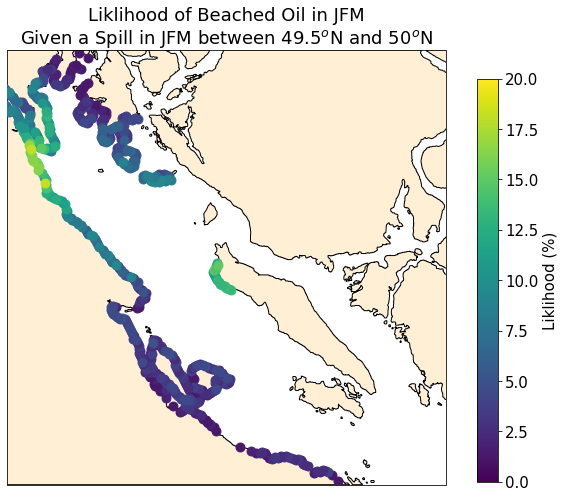

In [52]:
vmax = 20
normalize = colors.Normalize(vmin=0, vmax=vmax)
fig = plt.figure(figsize=(10, 8))
xlim, ylim = [-125.3, -123.9], [49.3, 50.2]
ax = plt.axes(projection=crs.Mercator(np.mean(xlim), *ylim))
ax.set_extent(xlim + ylim)
ax.add_feature(feature.GSHHSFeature('full', edgecolor='k', facecolor=landcolour))
st = 2
for bt in range(0, vmax, st):
#    print (bt)
    for ii in range(imin, imax):
        for jj in range(jmin, 180):
            if (oil[ii-imin, jj-jmin]*100 > bt) and (oil[ii-imin, jj-jmin]*100 < bt+st):
                ax.scatter(mesh.nav_lon[ii, jj] + dlon/2, mesh.nav_lat[ii, jj] + dlat/2, 
                           c=[oil[ii-imin, jj-jmin]*100], marker='o', s=80, 
                           transform=crs.PlateCarree(), zorder=bt+2, 
                           norm=normalize)
cax = fig.add_axes([0.86, 0.13, 0.03, 0.7])
cb = colorbar.ColorbarBase(cax, cmap=mcm.viridis, norm=normalize) 
cb.set_label('Liklihood (%)')
ax.set_title("Liklihood of Beached Oil in JFM\nGiven a Spill in JFM between 49.5$^o$N and 50$^o$N");
fig.savefig('BeachProb_JFM_scatter.png')

In [62]:
oil_AMJ = np.array([oil_array[i] for i in AMJ]).mean(axis=0)

In [70]:
oil_ma_AMJ = np.ma.masked_array(oil_AMJ, oil_AMJ < 0.01)  #mask anything less than 1%
oil = oil_ma_AMJ
print (oil.max())

0.1871345029239766


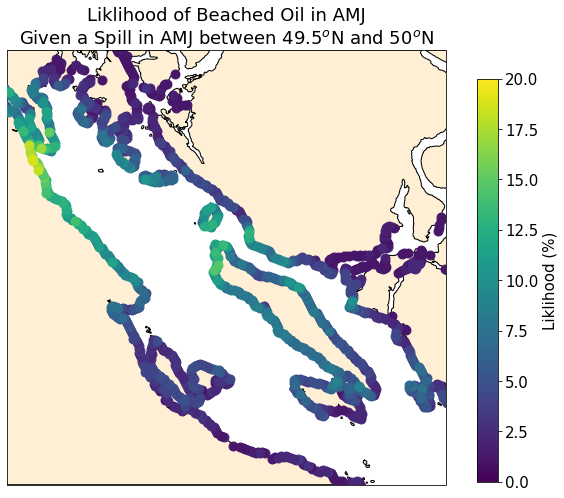

In [71]:
vmax = 20
normalize = colors.Normalize(vmin=0, vmax=vmax)
fig = plt.figure(figsize=(10, 8))
xlim, ylim = [-125.3, -123.9], [49.3, 50.2]
ax = plt.axes(projection=crs.Mercator(np.mean(xlim), *ylim))
ax.set_extent(xlim + ylim)
ax.add_feature(feature.GSHHSFeature('full', edgecolor='k', facecolor=landcolour))
st = 2
for bt in range(0, vmax, st):
#    print (bt)
    for ii in range(imin, imax):
        for jj in range(jmin, jmax):
            if (oil[ii-imin, jj-jmin]*100 > bt) and (oil[ii-imin, jj-jmin]*100 < bt+st):
                ax.scatter(mesh.nav_lon[ii, jj] + dlon/2, mesh.nav_lat[ii, jj] + dlat/2, 
                           c=[oil[ii-imin, jj-jmin]*100], marker='o', s=80, 
                           transform=crs.PlateCarree(), zorder=bt+2, 
                           norm=normalize)
cax = fig.add_axes([0.86, 0.13, 0.03, 0.7])
cb = colorbar.ColorbarBase(cax, cmap=mcm.viridis, norm=normalize) 
cb.set_label('Liklihood (%)')
ax.set_title("Liklihood of Beached Oil in AMJ\nGiven a Spill in AMJ between 49.5$^o$N and 50$^o$N");
fig.savefig('BeachProb_AMJ_scatter.png')

In [72]:
oil_JAS = np.array([oil_array[i] for i in JAS]).mean(axis=0)
oil_ma_JAS = np.ma.masked_array(oil_JAS, oil_JAS < 0.01)  #mask anything less than 1%
oil = oil_ma_JAS
print (oil.max())

0.19909502262443438


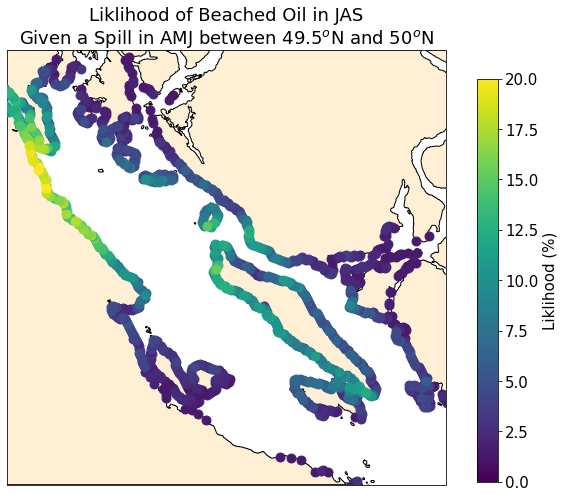

In [73]:
vmax = 20
normalize = colors.Normalize(vmin=0, vmax=vmax)
fig = plt.figure(figsize=(10, 8))
xlim, ylim = [-125.3, -123.9], [49.3, 50.2]
ax = plt.axes(projection=crs.Mercator(np.mean(xlim), *ylim))
ax.set_extent(xlim + ylim)
ax.add_feature(feature.GSHHSFeature('full', edgecolor='k', facecolor=landcolour))
st = 2
for bt in range(0, vmax, st):
#    print (bt)
    for ii in range(imin, imax):
        for jj in range(jmin, jmax):
            if (oil[ii-imin, jj-jmin]*100 > bt) and (oil[ii-imin, jj-jmin]*100 < bt+st):
                ax.scatter(mesh.nav_lon[ii, jj] + dlon/2, mesh.nav_lat[ii, jj] + dlat/2, 
                           c=[oil[ii-imin, jj-jmin]*100], marker='o', s=80, 
                           transform=crs.PlateCarree(), zorder=bt+2, 
                           norm=normalize)
cax = fig.add_axes([0.86, 0.13, 0.03, 0.7])
cb = colorbar.ColorbarBase(cax, cmap=mcm.viridis, norm=normalize) 
cb.set_label('Liklihood (%)')
ax.set_title("Liklihood of Beached Oil in JAS\nGiven a Spill in AMJ between 49.5$^o$N and 50$^o$N");
fig.savefig('BeachProb_JAS_scatter.png')

In [74]:
oil_OND = np.array([oil_array[i] for i in OND[:-1]]).mean(axis=0)
oil_ma_OND = np.ma.masked_array(oil_OND, oil_OND < 0.01)  #mask anything less than 1%
oil = oil_ma_OND
print (oil.max())

0.2046783625730994


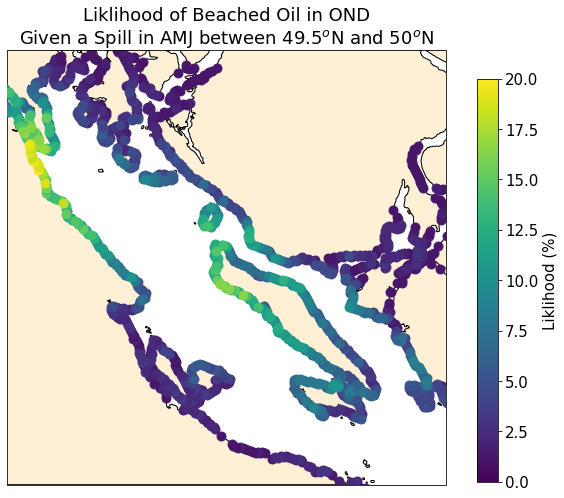

In [75]:
vmax = 20
normalize = colors.Normalize(vmin=0, vmax=vmax)
fig = plt.figure(figsize=(10, 8))
xlim, ylim = [-125.3, -123.9], [49.3, 50.2]
ax = plt.axes(projection=crs.Mercator(np.mean(xlim), *ylim))
ax.set_extent(xlim + ylim)
ax.add_feature(feature.GSHHSFeature('full', edgecolor='k', facecolor=landcolour))
st = 2
for bt in range(0, vmax, st):
#    print (bt)
    for ii in range(imin, imax):
        for jj in range(jmin, jmax):
            if (oil[ii-imin, jj-jmin]*100 > bt) and (oil[ii-imin, jj-jmin]*100 < bt+st):
                ax.scatter(mesh.nav_lon[ii, jj] + dlon/2, mesh.nav_lat[ii, jj] + dlat/2, 
                           c=[oil[ii-imin, jj-jmin]*100], marker='o', s=80, 
                           transform=crs.PlateCarree(), zorder=bt+2, 
                           norm=normalize)
cax = fig.add_axes([0.86, 0.13, 0.03, 0.7])
cb = colorbar.ColorbarBase(cax, cmap=mcm.viridis, norm=normalize) 
cb.set_label('Liklihood (%)')
ax.set_title("Liklihood of Beached Oil in OND\nGiven a Spill in AMJ between 49.5$^o$N and 50$^o$N");
fig.savefig('BeachProb_OND_scatter.png')

In [80]:
oil = oil_ma_JFM - oil_ma_JAS
print (oil.max(), oil.min())

0.052177601809954746 -0.10039592760180996


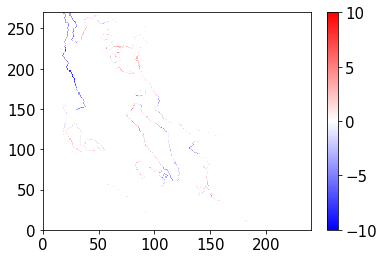

In [79]:
plt.pcolormesh(oil*100, cmap='bwr', vmax=10, vmin=-10)
plt.colorbar()

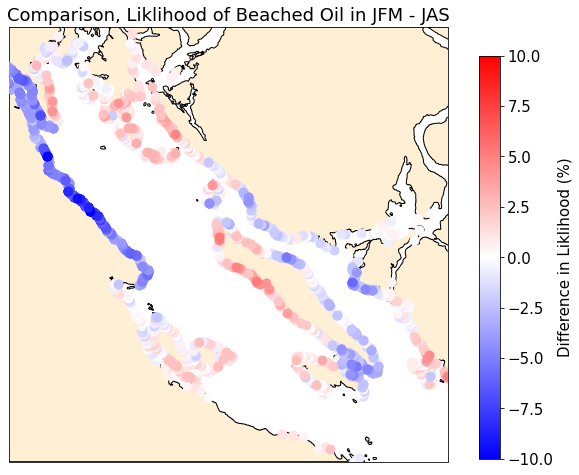

In [86]:
vmax = 10
normalize = colors.Normalize(vmin=-vmax, vmax=vmax)
fig = plt.figure(figsize=(10, 8))
xlim, ylim = [-125.3, -123.9], [49.3, 50.2]
ax = plt.axes(projection=crs.Mercator(np.mean(xlim), *ylim))
ax.set_extent(xlim + ylim)
ax.add_feature(feature.GSHHSFeature('full', edgecolor='k', facecolor=landcolour))
st = 2
for bt in range(0, vmax, st):
#    print (bt)
    for ii in range(imin, imax):
        for jj in range(jmin, jmax):
            if (abs(oil[ii-imin, jj-jmin]*100) > bt) and (abs(oil[ii-imin, jj-jmin]*100 < bt+st)):
                ax.scatter(mesh.nav_lon[ii, jj] + dlon/2, mesh.nav_lat[ii, jj] + dlat/2, 
                           c=[oil[ii-imin, jj-jmin]*100], marker='o', s=80, 
                           transform=crs.PlateCarree(), zorder=bt+2, 
                           norm=normalize, cmap='bwr')
cax = fig.add_axes([0.86, 0.13, 0.03, 0.7])
cb = colorbar.ColorbarBase(cax, cmap=mcm.bwr, norm=normalize) 
cb.set_label('Difference in Liklihood (%)')
ax.set_title("Comparison, Liklihood of Beached Oil in JFM - JAS");
fig.savefig('BeachProb_JFM-JAS_scatter.png')